Read and Display the cleaned dataset

In [0]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("/Volumes/workspace/default/netflix/netflix_cleaned.csv")

# Display first few records
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit,main_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,documentaries,"As her father nears the end of his life, filmm...",90,min,United States
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Seasons,"crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...,1,Seasons,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Seasons,"docuseries, reality tv","Feuds, flirtations and toilet talk go down amo...",1,Seasons,Unknown
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"international tv shows, romantic tv shows, tv ...",In a city of coaching centers known to train I...,2,Seasons,India


Date object type to data time type

In [0]:
# Convert 'date_added' to datetime type
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Verify conversion
print(df['date_added'].dtypes)
df.head()


datetime64[ns]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit,main_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,NaT,2020,PG-13,90 min,documentaries,"As her father nears the end of his life, filmm...",90,min,United States
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,NaT,2021,TV-MA,2 Seasons,"international tv shows, tv dramas, tv mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,NaT,2021,TV-MA,1 Seasons,"crime tv shows, international tv shows, tv act...",To protect his family from a powerful drug lor...,1,Seasons,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Not Available,Unknown,NaT,2021,TV-MA,1 Seasons,"docuseries, reality tv","Feuds, flirtations and toilet talk go down amo...",1,Seasons,Unknown
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,NaT,2021,TV-MA,2 Seasons,"international tv shows, romantic tv shows, tv ...",In a city of coaching centers known to train I...,2,Seasons,India


check number of rows and columns and show datatypes

In [0]:
# Check basic info
df.info()

# Check shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8806 non-null   object        
 1   type            8806 non-null   object        
 2   title           8806 non-null   object        
 3   director        8806 non-null   object        
 4   cast            8806 non-null   object        
 5   country         8806 non-null   object        
 6   date_added      0 non-null      datetime64[ns]
 7   release_year    8806 non-null   int64         
 8   rating          8806 non-null   object        
 9   duration        8806 non-null   object        
 10  listed_in       8806 non-null   object        
 11  description     8806 non-null   object        
 12  duration_value  8806 non-null   int64         
 13  duration_unit   8806 non-null   object        
 14  main_country    8804 non-null   object        
dtypes: d

make each column as null

In [0]:
# Replace all NaN/null values in the dataset with 0
df = df.fillna(0)

# Verify if there are any missing values left
print("Missing values after replacement:\n")
print(df.isnull().sum())


Missing values after replacement:

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
duration_value    0
duration_unit     0
main_country      0
dtype: int64


summary statistics for numerical data

In [0]:
# For numeric columns
# Numeric summary
print("\nNumeric Summary:\n")
print(df.describe())

# Categorical summary
print("\nCategorical Summary:\n")
print(df.describe(include='object'))





Numeric Summary:

       release_year  duration_value
count   8806.000000     8806.000000
mean    2014.180559       69.818192
std        8.819748       50.823322
min     1925.000000        0.000000
25%     2013.000000        2.000000
50%     2017.000000       88.000000
75%     2019.000000      106.000000
max     2021.000000      312.000000

Categorical Summary:

       show_id   type  ... duration_unit   main_country
count     8806   8806  ...          8806           8804
unique    8806      2  ...             2             86
top         s1  Movie  ...           min  United States
freq         1   6130  ...          6130           3211

[4 rows x 12 columns]


count of tv show and movie

In [0]:
# Count Movies vs TV Shows
type_count = df['type'].value_counts()
type_count


Movie      6130
TV Show    2676
Name: type, dtype: int64

count of countries

In [0]:
# Split multiple countries and count
countries = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = countries.value_counts().head(10)
top_countries


United States     3689
India             1046
Unknown            831
United Kingdom     805
Canada             445
France             392
Japan              318
Spain              232
South Korea        231
Germany            225
Name: country, dtype: int64

split multiple genres

In [0]:
# Split multiple genres and count
genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
top_genres


international movies        2752
dramas                      2427
comedies                    1674
international tv shows      1351
documentaries                869
action & adventure           858
tv dramas                    763
independent movies           756
children & family movies     641
romantic movies              616
Name: listed_in, dtype: int64

number of titles relesed in particular year

In [0]:
# Count number of titles released each year
release_trend = df['release_year'].value_counts().sort_index()
release_trend.tail(10)


2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, dtype: int64

visualisation movie vs tv show ,top 10 countries and genres

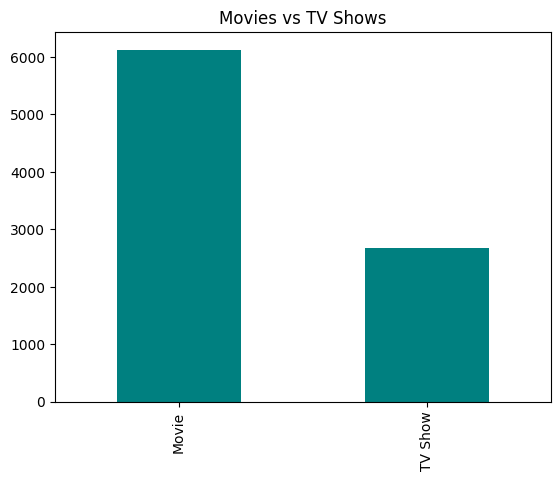

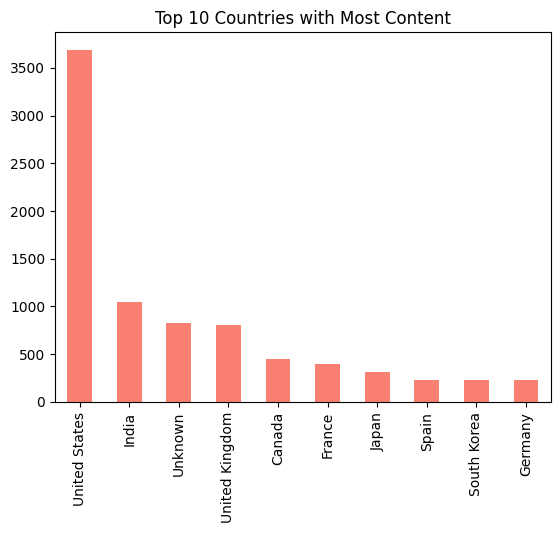

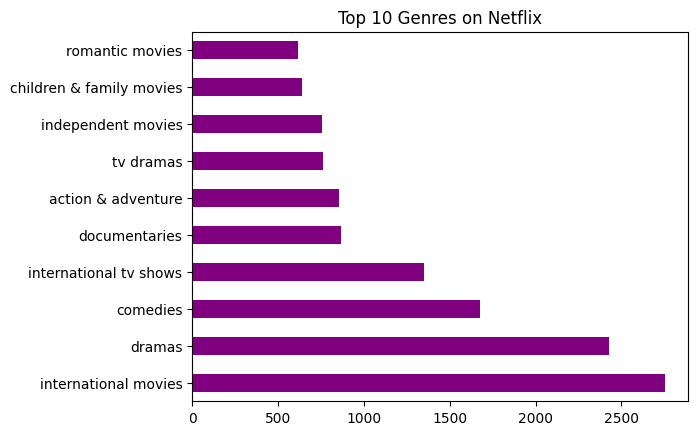

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Movie vs TV Show count
type_count.plot(kind='bar', color='teal', title='Movies vs TV Shows')
plt.show()

# 2. Top 10 Countries
top_countries.plot(kind='bar', color='salmon', title='Top 10 Countries with Most Content')
plt.show()

# 3. Top 10 Genres
top_genres.plot(kind='barh', color='purple', title='Top 10 Genres on Netflix')
plt.show()


CONTENT DURATION ANALYSIS PLOT

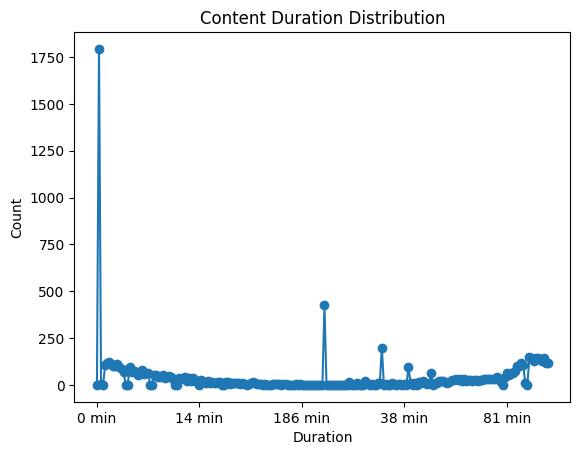

In [0]:
# Example: 'duration' column
df['duration'].value_counts().sort_index().plot(
    kind='line', marker='o', title='Content Duration Distribution'
)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()




**UNIVARIATE ANALYSIS**

count rating Distributions

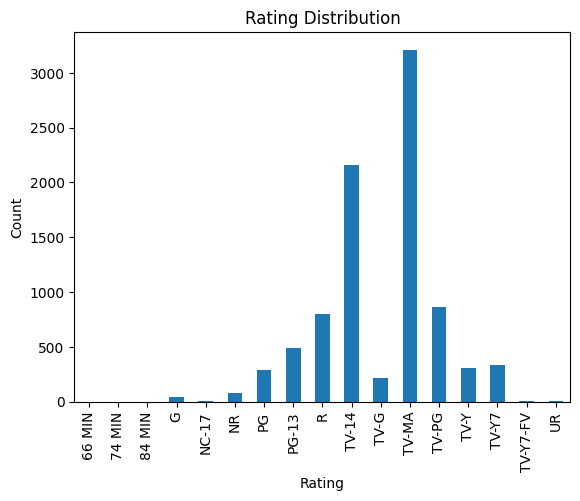

In [0]:
# Example: 'rating' column
df['rating'].value_counts().sort_index().plot(
    kind='bar', title='Rating Distribution'
)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


CONTENT RATING


Count of content ratings:

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        489
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 MIN         1
84 MIN         1
66 MIN         1
Name: rating, dtype: int64


<Axes: title={'center': 'Content Rating Distribution'}>

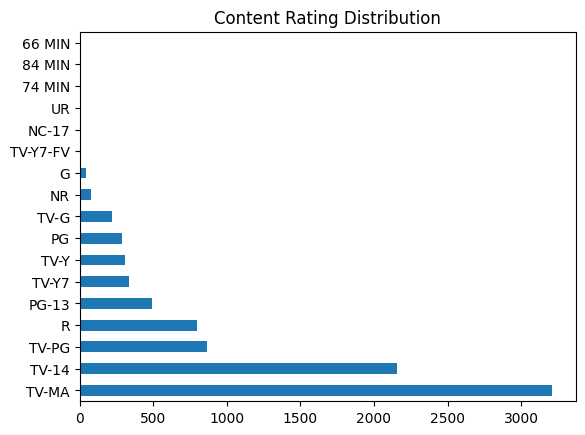

In [0]:
print("\nCount of content ratings:\n")
print(df['rating'].value_counts())

df['rating'].value_counts().plot(kind='barh', title='Content Rating Distribution')


DISTRIBUTION OF RELEASE YEARS


Release year distribution:

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64


<Axes: title={'center': 'Distribution of Release Years'}>

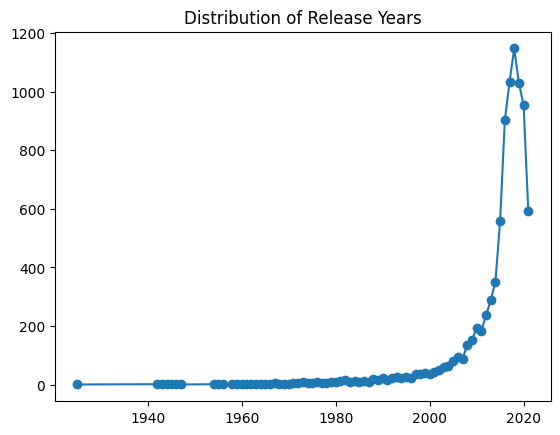

In [0]:
print("\nRelease year distribution:\n")
print(df['release_year'].value_counts().sort_index())

df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', title='Distribution of Release Years')


**BIVARIATE ANALYSIS**

TYPE VS RATING


Type vs Rating cross-tabulation:

type      Movie  TV Show
rating                  
66 MIN        1        0
74 MIN        1        0
84 MIN        1        0
G            41        0
NC-17         3        0
NR           75        5
PG          287        0
PG-13       489        0
R           797        2
TV-14      1427      733
TV-G        126       94
TV-MA      2064     1147
TV-PG       540      323
TV-Y        131      176
TV-Y7       139      195
TV-Y7-FV      5        1
UR            3        0


<Axes: title={'center': 'Type vs Rating'}, xlabel='rating'>

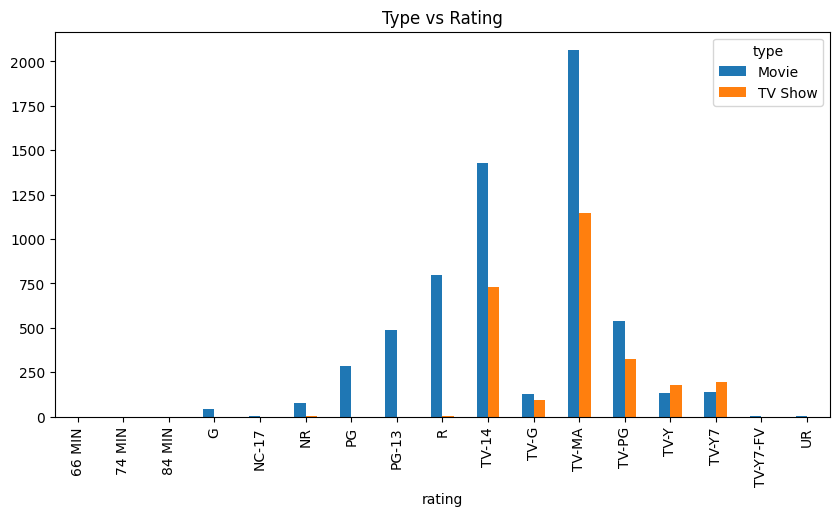

In [0]:
print("\nType vs Rating cross-tabulation:\n")
print(pd.crosstab(df['rating'], df['type']))

pd.crosstab(df['rating'], df['type']).plot(kind='bar', figsize=(10,5), title='Type vs Rating')


MOVIE VS TYPE


Top 10 Countries by Content Count (excluding Unknown):

type            Movie  TV Show
country                       
Canada            122       59
Egypt              92       14
France             75       49
India             893       79
Japan              76      169
Mexico             70       40
South Korea        41      158
Spain              97       48
United Kingdom    206      213
United States    2058      760


<Axes: title={'center': 'Movies vs TV Shows by Top 10 Countries'}, ylabel='country'>

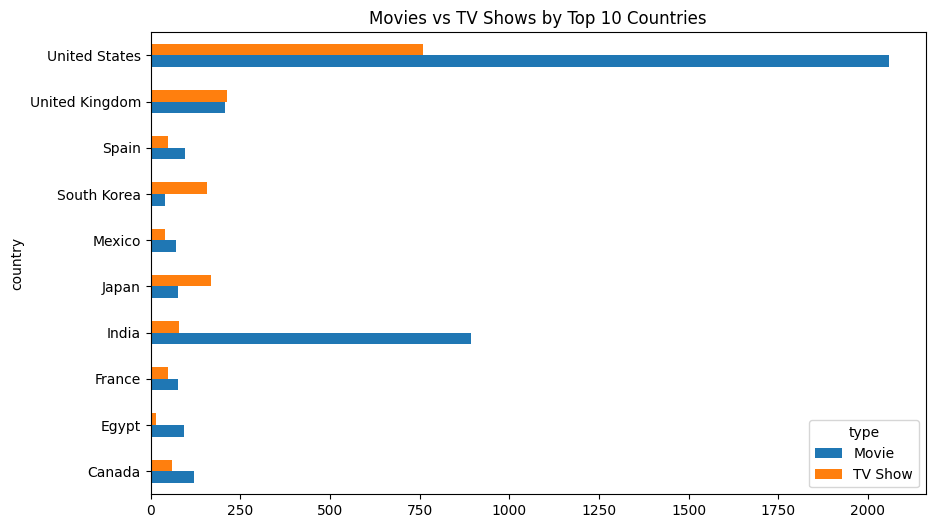

In [0]:
print("\nTop 10 Countries by Content Count (excluding Unknown):\n")

# Remove missing or 'Unknown' countries
filtered_df = df[
    df['country'].notna() &
    (df['country'].str.strip().str.lower() != 'unknown')
]

# Get top 10 countries by total content
top_countries = filtered_df['country'].value_counts().head(10).index

# Filter dataset to only top 10 countries
top_df = filtered_df[filtered_df['country'].isin(top_countries)]

# Create a cross-tab (country vs type)
country_type = pd.crosstab(top_df['country'], top_df['type'])

print(country_type)

# Plot side-by-side bar chart
country_type.plot(kind='barh', figsize=(10,6), title='Movies vs TV Shows by Top 10 Countries')



TOP 10 DIRECTORS


Top 10 Directors (excluding 'Unknown' or missing values):

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64


<Axes: title={'center': 'Top 10 Directors (Excluding Unknown)'}>

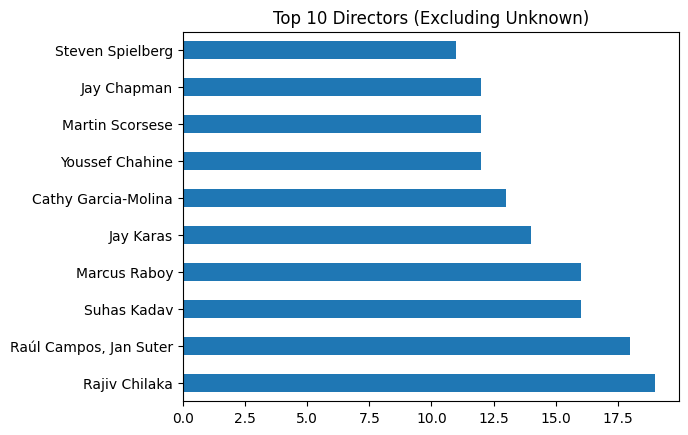

In [0]:
print("\nTop 10 Directors (excluding 'Unknown' or missing values):\n")

# Exclude Unknown and missing directors
filtered_directors = df[
    df['director'].notna() &                  # remove NaN
    (df['director'].str.strip().str.lower() != 'unknown director')  # remove 'Unknown' (case-insensitive)
]

# Count top 10 directors
top_directors = filtered_directors['director'].value_counts().head(10)
print(top_directors)

# Plot
top_directors.plot(kind='barh', title='Top 10 Directors (Excluding Unknown)')




TOP 10 COUNTRIES

<Axes: title={'center': 'Top 10 Countries'}>

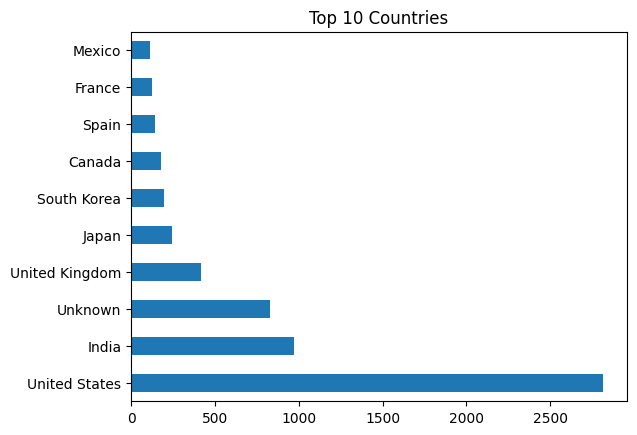

In [0]:
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries')


TOP 10 GENRES

<Axes: title={'center': 'Top 10 Genres'}>

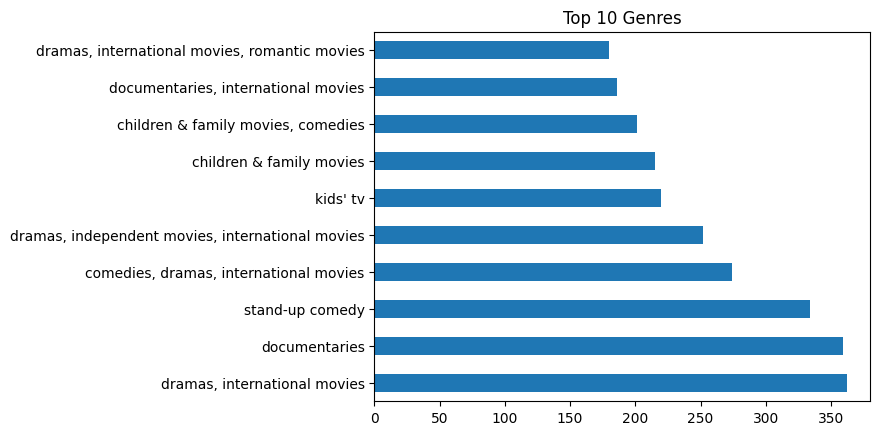

In [0]:
df['listed_in'].value_counts().head(10).plot(kind='barh', title='Top 10 Genres')


TOP MOST COMMON WORDS USED

In [0]:
# Most common words in titles
titles = df['title'].str.cat(sep=' ')
words = pd.Series(titles.split()).value_counts().head(10)
print("\nTop 10 most common words in Titles:\n")
print(words)



Top 10 most common words in Titles:

The     1545
of       692
the      677
in       229
and      225
A        217
&        179
to       168
Love     149
My       143
dtype: int64


FINAL SUMMARY OF THE DATASET

In [0]:
print("\n🔹 Quick Insights 🔹")
print(f"Total records: {len(df)}")
print(f"Movies: {df[df['type']=='Movie'].shape[0]} | TV Shows: {df[df['type']=='TV Show'].shape[0]}")
print(f"Most common rating: {df['rating'].mode()[0]}")
print(f"Most frequent country: {df['country'].mode()[0]}")
print(f"Most frequent genre: {df['listed_in'].mode()[0]}")



🔹 Quick Insights 🔹
Total records: 8806
Movies: 6130 | TV Shows: 2676
Most common rating: TV-MA
Most frequent country: United States
Most frequent genre: dramas, international movies
